In [32]:
!python3 vrp-sample-gen.py 50 50 0 100 0 100 > "Dataset/input_1.txt"
!python3 vrp-sample-gen.py 50 50 0 100 0 100 > "Dataset/input_2.txt"
!python3 vrp-sample-gen.py 50 50 0 100 0 100 > "Dataset/input_3.txt"
!python3 vrp-sample-gen.py 50 100 0 100 0 100 > "Dataset/input_4.txt"
!python3 vrp-sample-gen.py 50 100 0 100 0 100 > "Dataset/input_5.txt"
!python3 vrp-sample-gen.py 50 100 0 100 0 100 > "Dataset/input_6.txt"
!python3 vrp-sample-gen.py 100 50 0 100 0 100 > "Dataset/input_7.txt"
!python3 vrp-sample-gen.py 100 50 0 100 0 100 > "Dataset/input_8.txt"
!python3 vrp-sample-gen.py 100 50 0 100 0 100 > "Dataset/input_9.txt"
!python3 vrp-sample-gen.py 100 100 0 100 0 100 > "Dataset/input_10.txt"

In [33]:
import subprocess
import re
import time
from IPython.display import display, Image, clear_output
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import pandas as pd 

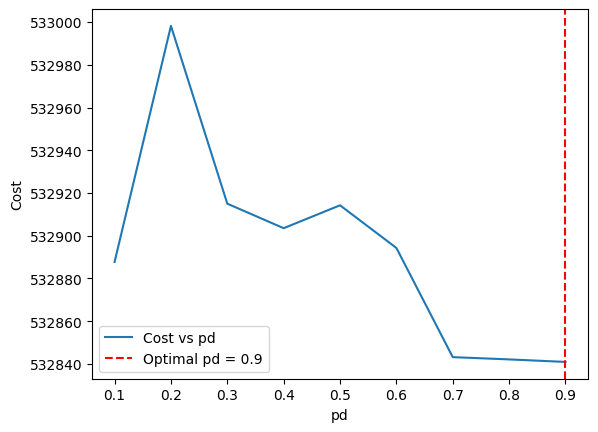

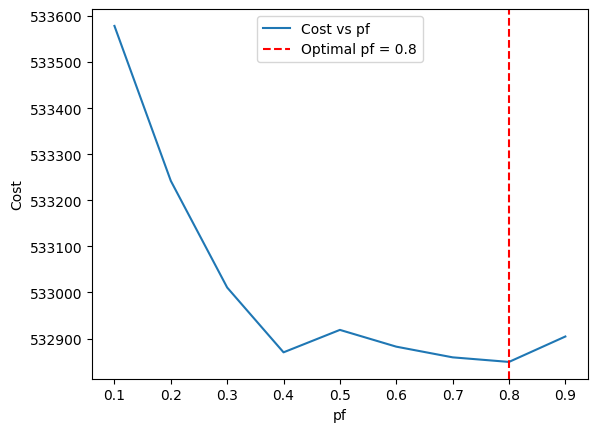

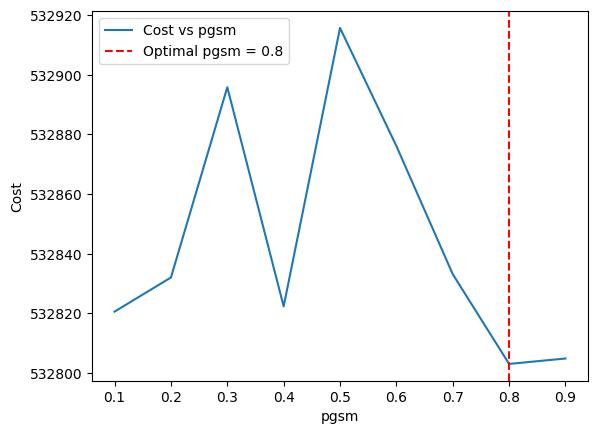

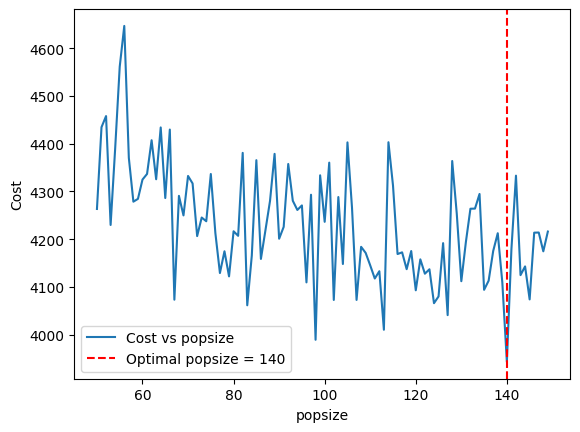

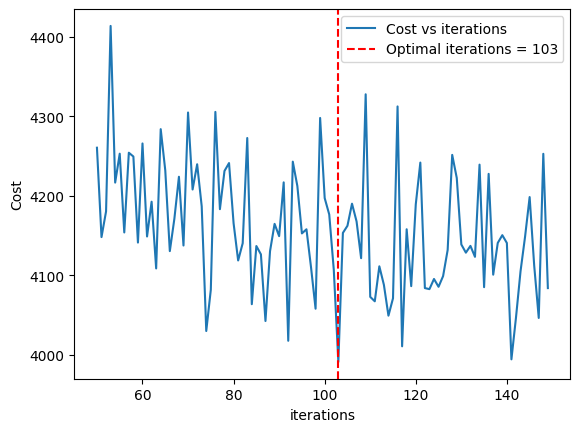

In [34]:
def cost_calculation_bo(popsize, iterations, pd, pf, pgsm):
    command = f"python3 vrp_BO.py {popsize} {iterations} {pd} {pf} {pgsm} static< /Users/akshatanshnayak/Desktop/Bonobo-Optimisation-for-VRP/Dataset/input_1.txt"
    process = subprocess.Popen(command, stdout=subprocess.PIPE, shell=True, text=True)
    output, _ = process.communicate()
    split = output.split('\n')
    return float(split[-1])

def cost_calculation_ga(popsize, iterations):
    command = f"python3 vrp_GA.py {popsize} {iterations} adaptive< /Users/akshatanshnayak/Desktop/Bonobo-Optimisation-for-VRP/Dataset/input_1.txt"
    process = subprocess.Popen(command, stdout=subprocess.PIPE, shell=True, text=True)
    output, _ = process.communicate()
    split = output.split('\n')
    return float(split[-1])

# Initial parameters
pd = 0.5
pf = 0.7
pgsm = 0.9
popsize = 100
iterations = 100

# Optimal parameters initialization
pd_opt = pd
pf_opt = pf
pgsm_opt = pgsm
popsize_opt = popsize
iterations_opt = iterations
min_cost = np.inf

# Lists to store costs for plotting
pd_costs, pf_costs, pgsm_costs, popsize_costs, iteration_costs = [], [], [], [], []

# Optimize pd
for i in np.arange(0.1, 1, 0.1):
    pd = i
    cost = cost_calculation_bo(popsize, iterations, pd, pf, pgsm)
    pd_costs.append((pd, cost))
    if min_cost > cost:
        min_cost = cost
        pd_opt = pd

# Optimize pf
min_cost = np.inf
for i in np.arange(0.1, 1, 0.1):
    pf = i
    cost = cost_calculation_bo(popsize, iterations, pd_opt, pf, pgsm)
    pf_costs.append((pf, cost))
    if min_cost > cost:
        min_cost = cost
        pf_opt = pf

# Optimize pgsm
min_cost = np.inf
for i in np.arange(0.1, 1, 0.1):
    pgsm = i
    cost = cost_calculation_bo(popsize, iterations, pd_opt, pf_opt, pgsm)
    pgsm_costs.append((pgsm, cost))
    if min_cost > cost:
        min_cost = cost
        pgsm_opt = pgsm

# Optimize popsize
min_cost = np.inf
for i in range(50, 150):
    popsize = i
    cost = cost_calculation_ga(popsize, iterations)
    popsize_costs.append((popsize, cost))
    if min_cost > cost:
        min_cost = cost
        popsize_opt = popsize

# Optimize iterations
min_cost = np.inf
for i in range(50, 150):
    iterations = i
    cost = cost_calculation_ga(popsize_opt, iterations)
    iteration_costs.append((iterations, cost))
    if min_cost > cost:
        min_cost = cost
        iterations_opt = iterations

# Plotting
def plot_costs(parameter_values, costs, param_name, opt_value):
    plt.figure()
    plt.plot(parameter_values, costs, label=f"Cost vs {param_name}")
    plt.axvline(opt_value, color='r', linestyle='--', label=f'Optimal {param_name} = {opt_value}')
    plt.xlabel(param_name)
    plt.ylabel("Cost")
    plt.legend()
    plt.show()

# Extract values and plot for each parameter
pd_values, pd_cost_values = zip(*pd_costs)
plot_costs(pd_values, pd_cost_values, "pd", pd_opt)

pf_values, pf_cost_values = zip(*pf_costs)
plot_costs(pf_values, pf_cost_values, "pf", pf_opt)

pgsm_values, pgsm_cost_values = zip(*pgsm_costs)
plot_costs(pgsm_values, pgsm_cost_values, "pgsm", pgsm_opt)

popsize_values, popsize_cost_values = zip(*popsize_costs)
plot_costs(popsize_values, popsize_cost_values, "popsize", popsize_opt)

iteration_values, iteration_cost_values = zip(*iteration_costs)
plot_costs(iteration_values, iteration_cost_values, "iterations", iterations_opt)

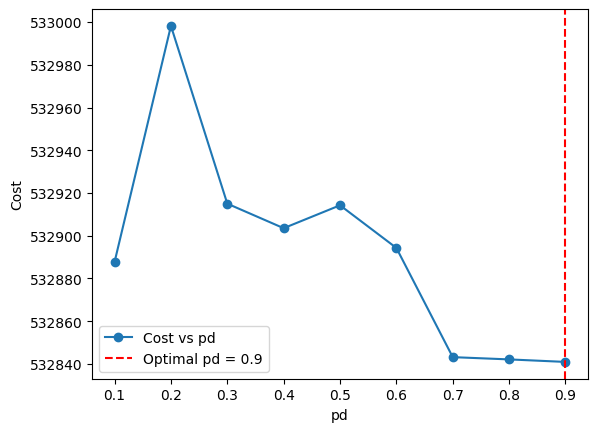

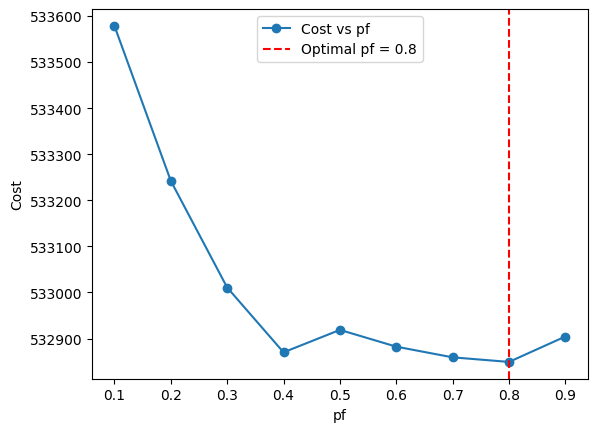

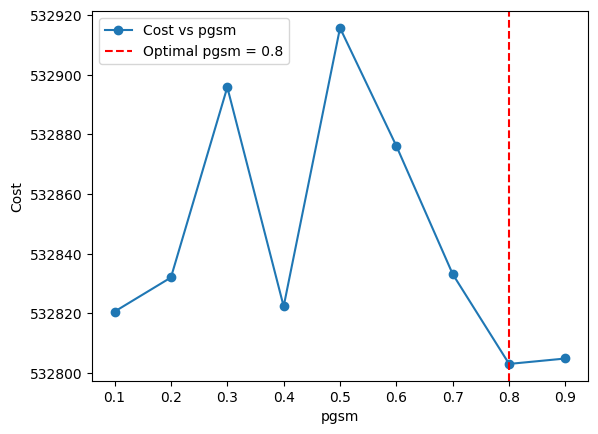

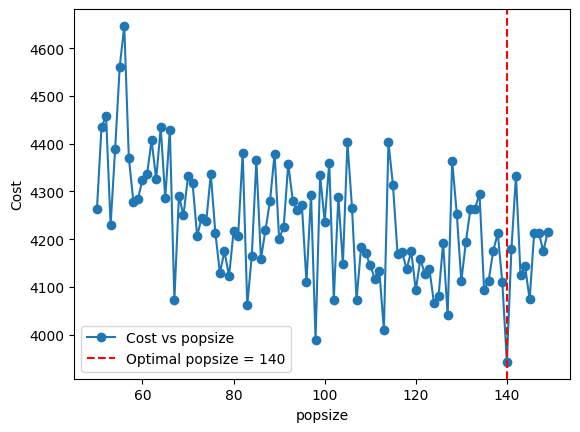

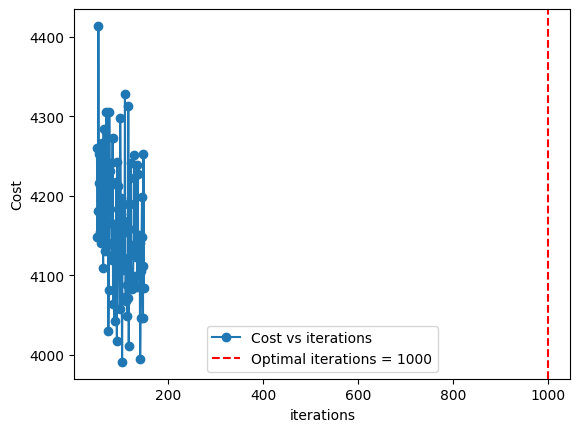

In [156]:
# Plotting
def plot_costs(parameter_values, costs, param_name, opt_value):
    plt.figure()
    plt.plot(parameter_values, costs, label=f"Cost vs {param_name}", marker="o")
    plt.axvline(opt_value, color='r', linestyle='--', label=f'Optimal {param_name} = {opt_value}')
    plt.xlabel(param_name)
    plt.ylabel("Cost")
    plt.legend()
    plt.show()

# Extract values and plot for each parameter
pd_values, pd_cost_values = zip(*pd_costs)
plot_costs(pd_values, pd_cost_values, "pd", pd_opt)

pf_values, pf_cost_values = zip(*pf_costs)
plot_costs(pf_values, pf_cost_values, "pf", pf_opt)

pgsm_values, pgsm_cost_values = zip(*pgsm_costs)
plot_costs(pgsm_values, pgsm_cost_values, "pgsm", pgsm_opt)

popsize_values, popsize_cost_values = zip(*popsize_costs)
plot_costs(popsize_values, popsize_cost_values, "popsize", popsize_opt)

iteration_values, iteration_cost_values = zip(*iteration_costs)
plot_costs(iteration_values, iteration_cost_values, "iterations", iterations_opt)

In [106]:
iterations_opt = 1000

In [116]:
#Format: python3 vrp_GA.py [Population Size] [Iterations] < input.txt
command1 = f"python3 vrp_GA.py {popsize_opt} {iterations_opt} < /Users/akshatanshnayak/Desktop/Bonobo-Optimisation-for-VRP/Dataset/input_1.txt"
command2 = f"python3 vrp_BO.py {popsize_opt} {iterations_opt} {pd_opt} {pf_opt} {pgsm_opt} adaptive< /Users/akshatanshnayak/Desktop/Bonobo-Optimisation-for-VRP/Dataset/input_1.txt"

with open('/Users/akshatanshnayak/Desktop/Bonobo-Optimisation-for-VRP/Dataset/input_1.txt', 'r') as file:
    dataset = file.read()

In [108]:
start_time = time.time()

process = subprocess.Popen(command1, stdout=subprocess.PIPE, shell=True, text=True)
output, _ = process.communicate()

end_time = time.time()
time1 = end_time - start_time

split1 = output.split('\n')
final_cost_1 = split1[-1]
route1 = split1[iterations_opt:-1]
cost_list_1 = split1[:iterations_opt]

start_time = time.time()

process = subprocess.Popen(command2, stdout=subprocess.PIPE, shell=True, text=True)
output, _ = process.communicate()

end_time = time.time()
time2 = end_time - start_time

split2 = output.split('\n')
final_cost_2 = split2[-1]
route2 = split2[iterations_opt:-1]
cost_list_2 = split2[:iterations_opt]

In [109]:
cost_list_1 = list(map(float, cost_list_1))
cost_list_2 = list(map(float, cost_list_2))

In [141]:
print(time1)
print(time2)

115.84245181083679
12535.609966278076


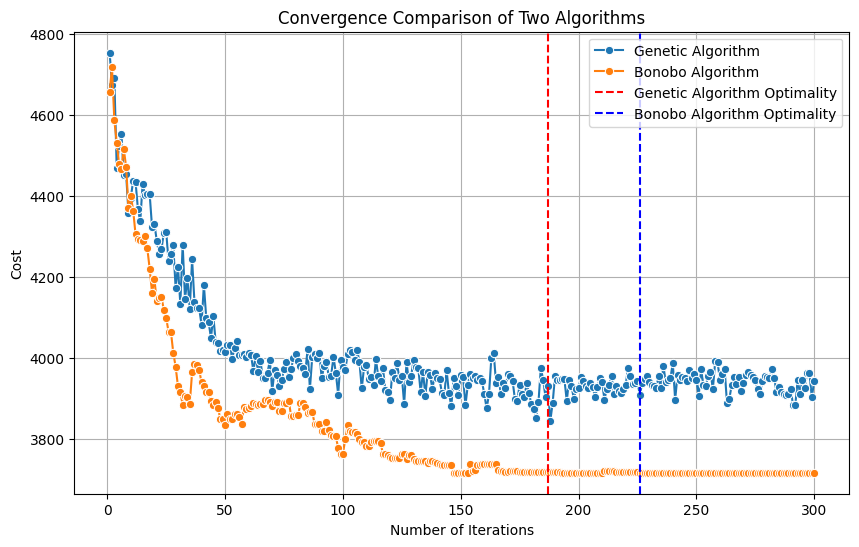

In [155]:
x = list(range(1, 300 + 1))

# Creating DataFrame for seaborn to facilitate dual algorithm comparison
data = pd.DataFrame({
    "Iteration": x*2,  # Repeat iteration numbers for both algorithms
    "Cost": cost_list_1[:300] + cost_list_2[:300],
    "Algorithm": ["Genetic Algorithm"] * 300 + ["Bonobo Algorithm"] * 300
})

# Plotting with Seaborn
plt.figure(figsize=(10, 6))
sns.lineplot(data=data, x="Iteration", y="Cost", hue="Algorithm", marker="o")

# Finding optimal costs and iterations for both algorithms
optimal_iteration_1 = cost_list_1.index(min(cost_list_1))
optimal_iteration_2 = cost_list_2.index(min(cost_list_2))

# Drawing vertical lines with separate labels
plt.axvline(optimal_iteration_1, color='r', linestyle='--', label=f'Genetic Algorithm Optimality')
plt.axvline(optimal_iteration_2, color='b', linestyle='--', label=f'Bonobo Algorithm Optimality')

# Adding title, labels, and legend
plt.title("Convergence Comparison of Two Algorithms")
plt.xlabel("Number of Iterations")
plt.ylabel("Cost")
plt.grid(True)
plt.legend()  # Ensures labels for axvlines appear in the legend
plt.show()

In [113]:
print(f"Genetic Algorithm - Cost: {final_cost_1}, Time: {time1}")
print(f"Bonobo Optimization - Cost: {final_cost_2}, Time: {time2}")

Genetic Algorithm - Cost: 3940.013423, Time: 115.84245181083679
Bonobo Optimization - Cost: 3716.245543, Time: 12535.609966278076


In [117]:
coordinates = re.findall(r'node\d+\s+\S+\s+([-]?\d+\.\d+)\s+([-]?\d+\.\d+)', dataset)

coordinates_list = [(0.0, 0.0)]
coordinates_list+=[(float(x), float(y)) for x, y in coordinates]

In [118]:
import cv2
import numpy as np

route1 = [int(node) for node in route1]
route2 = [int(node) for node in route2]

route_coordinates1 = [(int(coordinates_list[node][0]),int(coordinates_list[node][1])) for node in route1]
route_coordinates2 = [(int(coordinates_list[node][0]),int(coordinates_list[node][1])) for node in route2]

In [119]:
def display_image(img):
    _, encoded_img = cv2.imencode('.png', img)
    display(Image(data=encoded_img))

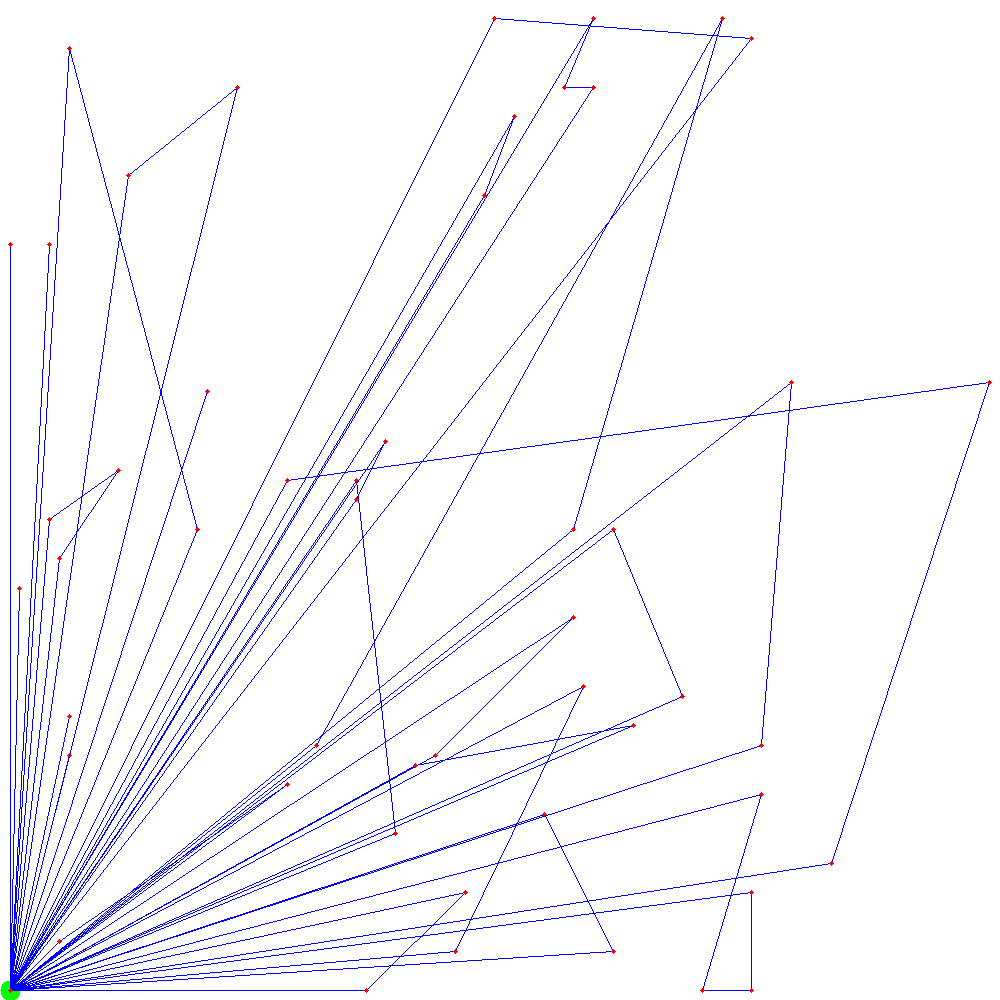

In [120]:
image_size = 1000
image = np.ones((image_size, image_size, 3), dtype=np.uint8) * 255

x_coords = [coord[0] for coord in coordinates_list]
y_coords = [coord[1] for coord in coordinates_list]

x_min, x_max = min(x_coords), max(x_coords)
y_min, y_max = min(y_coords), max(y_coords)

def normalize(value, min_value, max_value, image_dim):
    return int((value - min_value) / (max_value - min_value) * (image_dim - 20) + 10)

depot_x = normalize(coordinates_list[0][0], x_min, x_max, image_size)
depot_y = normalize(coordinates_list[0][1], y_min, y_max, image_size)
cv2.circle(image, (depot_x, image_size - depot_y), 10, (0, 255, 0), -1)  # Green color for depot

for i in range(len(route_coordinates1) - 1):
    x1 = normalize(route_coordinates1[i][0], x_min, x_max, image_size)
    y1 = normalize(route_coordinates1[i][1], y_min, y_max, image_size)
    x2 = normalize(route_coordinates1[i + 1][0], x_min, x_max, image_size)
    y2 = normalize(route_coordinates1[i + 1][1], y_min, y_max, image_size)

    cv2.line(image, (x1, image_size - y1), (x2, image_size - y2), (255, 0, 0), 1)
    cv2.circle(image, (x1, image_size - y1), 2, (0, 0, 255), -1)

    clear_output(wait=True)
    display_image(image)
    time.sleep(0.2)  

x_last = normalize(route_coordinates1[-1][0], x_min, x_max, image_size)
y_last = normalize(route_coordinates1[-1][1], y_min, y_max, image_size)
cv2.circle(image, (x_last, image_size - y_last), 2, (0, 0, 255), -1)

clear_output(wait=True)
display_image(image)

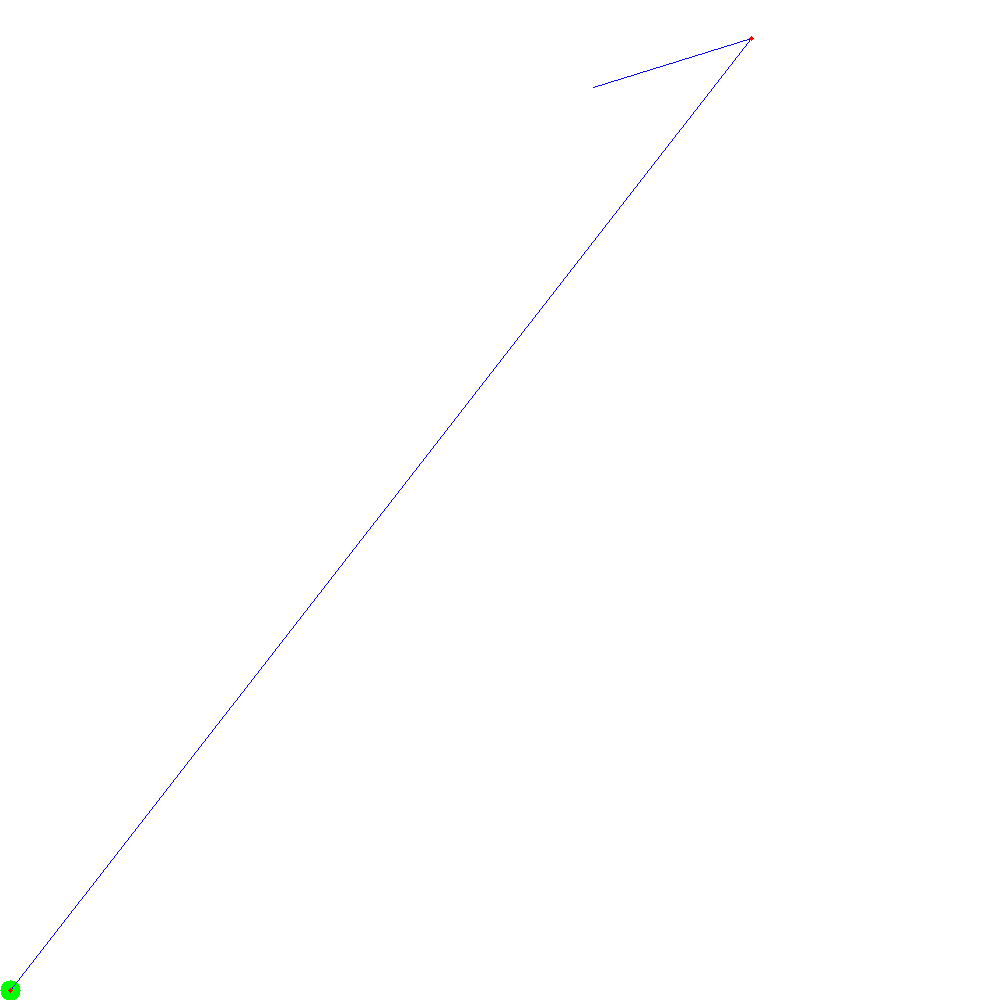

KeyboardInterrupt: 

In [124]:
image_size = 1000
image = np.ones((image_size, image_size, 3), dtype=np.uint8) * 255

x_coords = [coord[0] for coord in coordinates_list]
y_coords = [coord[1] for coord in coordinates_list]

x_min, x_max = min(x_coords), max(x_coords)
y_min, y_max = min(y_coords), max(y_coords)

def normalize(value, min_value, max_value, image_dim):
    return int((value - min_value) / (max_value - min_value) * (image_dim - 20) + 10)

depot_x = normalize(coordinates_list[0][0], x_min, x_max, image_size)
depot_y = normalize(coordinates_list[0][1], y_min, y_max, image_size)
cv2.circle(image, (depot_x, image_size - depot_y), 10, (0, 255, 0), -1)  # Green color for depot

for i in range(len(route_coordinates2) - 1):
    x1 = normalize(route_coordinates2[i][0], x_min, x_max, image_size)
    y1 = normalize(route_coordinates2[i][1], y_min, y_max, image_size)
    x2 = normalize(route_coordinates2[i + 1][0], x_min, x_max, image_size)
    y2 = normalize(route_coordinates2[i + 1][1], y_min, y_max, image_size)

    cv2.line(image, (x1, image_size - y1), (x2, image_size - y2), (255, 0, 0), 1)
    cv2.circle(image, (x1, image_size - y1), 2, (0, 0, 255), -1)

    clear_output(wait=True)
    display_image(image)
    time.sleep(0.2)  

x_last = normalize(route_coordinates2[-1][0], x_min, x_max, image_size)
y_last = normalize(route_coordinates2[-1][1], y_min, y_max, image_size)
cv2.circle(image, (x_last, image_size - y_last), 2, (0, 0, 255), -1)

clear_output(wait=True)
display_image(image)